# EDA on Streaming History
### General EDA
#### 1. Import Libraries and Load Cleaned Data

In [2]:
# import libraries
import pandas as pd

# load the cleaned data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')

#### 2. Understand data structure and content

In [3]:
# check the first few rows
print(music_tracks_df.head())
print(podcast_episodes_df.head())


# get statistical summary 
# music tracks
print(music_tracks_df.info()) 
print(music_tracks_df.describe())  

# podcast episodes
print(podcast_episodes_df.info())
print(podcast_episodes_df.describe())

                   date_time                 platform  ms_played country  \
0  2020-08-31 08:28:04+00:00  iOS 13.6.1 (iPhone12,1)     281533      NZ   
1  2020-08-31 08:28:04+00:00  iOS 13.6.1 (iPhone12,1)     308546      NZ   
2  2020-08-31 08:28:04+00:00  iOS 13.6.1 (iPhone12,1)        831      NZ   
3  2020-08-31 08:28:04+00:00  iOS 13.6.1 (iPhone12,1)       1429      NZ   
4  2020-08-31 08:28:04+00:00  iOS 13.6.1 (iPhone12,1)        533      NZ   

                        track_name   artist_name            album_name  \
0                              醉赤壁        JJ Lin                   JJ陸   
1                              月牙灣        F.I.R.                  愛‧歌姬   
2                               償還   Joanna Wang                为爱做的一切   
3  Youth (feat. Khalid) - Acoustic  Shawn Mendes  Youth (feat. Khalid)   
4                               擁有      Yoga Lin                  美妙生活   

                      spotify_track_uri reason_start reason_end  ...  skipped  \
0  spotify:track:

#### 3. Check for nulls

In [4]:
# check for null values in music data
print(music_tracks_df.isnull().sum())

# check for null values in podcast data
print(podcast_episodes_df.isnull().sum())

'''
The null values are associated with `false` in the `offline` column.
Thus the null values are valid.
'''

date_time                0
platform                 0
ms_played                0
country                  0
track_name               0
artist_name              0
album_name               0
spotify_track_uri        0
reason_start             0
reason_end               0
shuffle                  0
skipped                  0
offline                  0
offline_timestamp    60462
incognito_mode           0
date                     0
year                     0
month                    0
day                      0
month_year               0
minutes_played           0
dtype: int64
date_time                 0
platform                  0
ms_played                 0
country                   0
episode_name              0
show_name                 0
spotify_episode_uri       0
reason_start              0
reason_end                0
shuffle                   0
skipped                   0
offline                   0
offline_timestamp      5644
incognito_mode            0
date                      0


'\nThe null values are associated with `false` in the `offline` column.\nThus the null values are valid.\n'

#### 4. Identify Outliers

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30624\92362083.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=music_tracks_df['minutes_played'], palette='Blues_r')


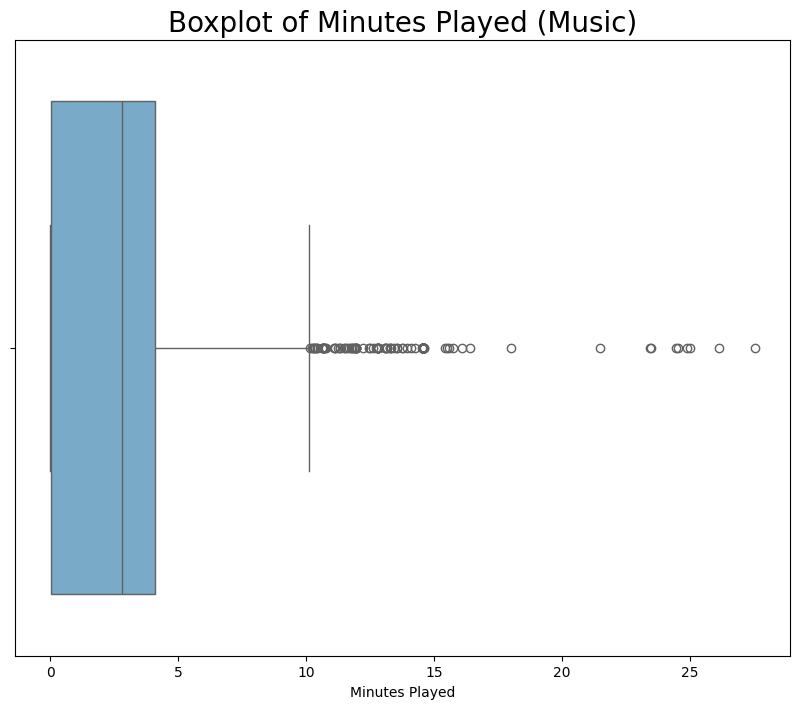

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30624\92362083.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=podcast_episodes_df['minutes_played'], palette = 'Blues_r')


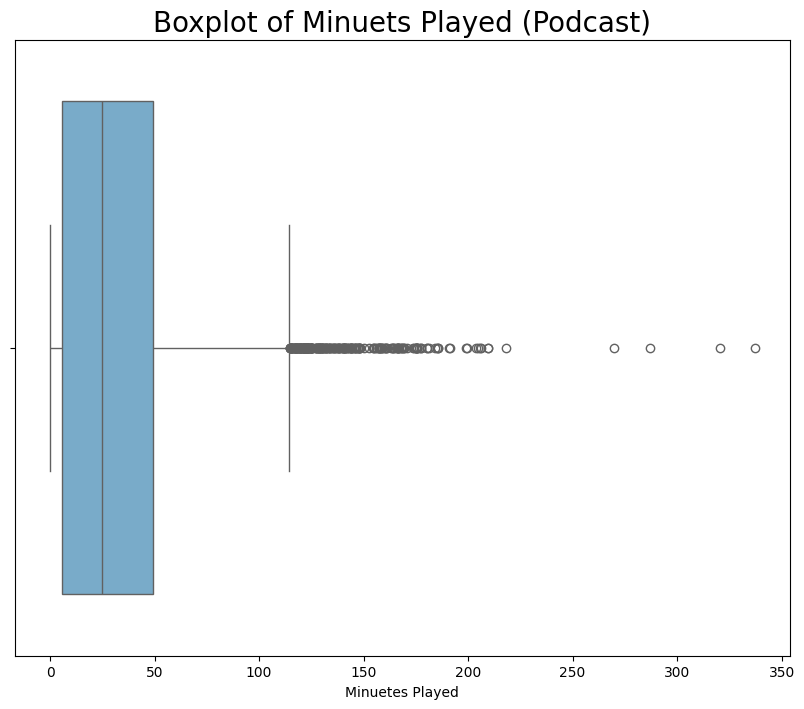

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')
# create boxplot for minutes_played in music streaming dataset
plt.figure(figsize=(10,8))
# use minutes_played to create the boxplot
sns.boxplot(x=music_tracks_df['minutes_played'], palette='Blues_r')
plt.title('Boxplot of Minutes Played (Music)', fontsize = 20)
plt.xlabel('Minutes Played')
plt.show()

# create boxplot for minutes_played in podcast streaming dataset
plt.figure(figsize=(10,8))
# use minutes played to create the boxplot
sns.boxplot(x=podcast_episodes_df['minutes_played'], palette = 'Blues_r')
plt.title('Boxplot of Minuets Played (Podcast)', fontsize = 20)
plt.xlabel('Minuetes Played')
plt.show()

#### Investigate Outliers

In [8]:
# filter out tracks that has minutes_played greater than 10
outliers = music_tracks_df[music_tracks_df['minutes_played'] > 10]
print(outliers[['track_name','artist_name','minutes_played','reason_start']])

# filter out podcasts that has minutes_played greater than 50
outliers = podcast_episodes_df[podcast_episodes_df['minutes_played'] > 50]
print(outliers[['show_name','minutes_played']])

                 track_name  artist_name  minutes_played reason_start
1720                不為誰而作的歌       JJ Lin       13.096067       fwdbtn
2449    心酸+浪費+耳朵+想自由 - Live     Yoga Lin       10.658817       fwdbtn
3552        愛情的模樣 Life Live       Mayday       10.308067       fwdbtn
12781                   不煽情           許嵩       10.352750    trackdone
30913                 Faded  Alan Walker       11.337850      appload
...                     ...          ...             ...          ...
161130                   牽手    Julie Sue       11.593617    trackdone
161488                花又開好了        S.H.E       10.777100      backbtn
161515                    姐    Hebe Tien       14.522633     clickrow
164459   勁歌金曲2 - 情歌王 - Live       Leo Ku       12.641317    trackdone
176153                 灵魂伴侣    Hebe Tien       13.299400    trackdone

[162 rows x 4 columns]
          show_name  minutes_played
94           腦闆想什麼？       50.655633
96           腦闆想什麼？       77.188250
149          腦闆想什麼？       53